# Name: D. M. Khalid Mahmud

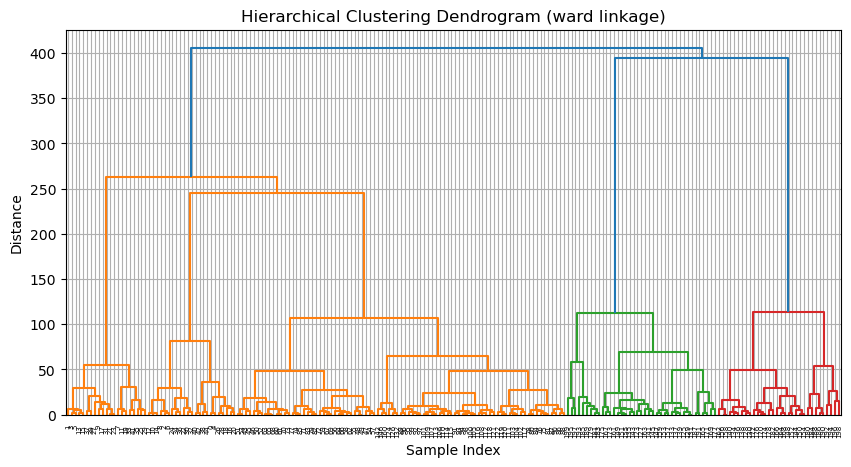

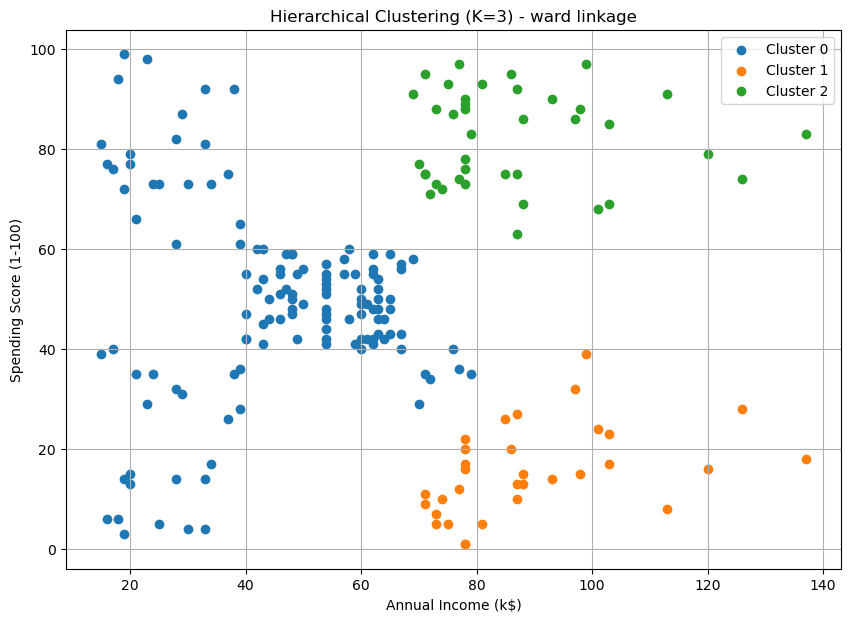

In [4]:
# Importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering

# Load the dataset
data = pd.read_csv("Mall_Customers.csv")  # Replace with the actual file path

# Selecting relevant features for clustering
X = data.iloc[:, [3, 4]].values  # Annual Income and Spending Score

# Perform hierarchical clustering
# Define the linkage method and the number of clusters
linkage_method = 'ward'  # You can try 'single', 'complete', 'average', etc.
n_clusters = 3  # Replace with the desired number of clusters

# Create the linkage matrix
Z = linkage(X, method=linkage_method)

# Plot the dendrogram
plt.figure(figsize=(10, 5))
dendrogram(Z)
plt.title(f'Hierarchical Clustering Dendrogram ({linkage_method} linkage)')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.grid()
plt.show()

# Fit Agglomerative Clustering with the chosen number of clusters
agg_clustering = AgglomerativeClustering(n_clusters=n_clusters, linkage=linkage_method)
agg_clustering.fit(X)

# Add cluster labels to the dataset
data['Cluster'] = agg_clustering.labels_

# Visualize the clusters
plt.figure(figsize=(10, 7))
for cluster in range(n_clusters):
    plt.scatter(data[data['Cluster'] == cluster]['Annual Income (k$)'],
                data[data['Cluster'] == cluster]['Spending Score (1-100)'],
                label=f'Cluster {cluster}')

plt.title(f'Hierarchical Clustering (K={n_clusters}) - {linkage_method} linkage')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.grid()
plt.show()
